In [41]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [42]:
#emotion_labelデータの読みこみ

# data1_b_label_50 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_50.csv')
# data1_b_label_60 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_60.csv')
# data1_b_label_70 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_70.csv')
# data1_b_label_80 = pd.read_csv('emotion_label/B/emotion_B_20201111_1_80.csv')

data2_b_label_50 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_50.csv')
data2_b_label_60 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_60.csv')
data2_b_label_70 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_70.csv')
data2_b_label_80 = pd.read_csv('emotion_label/session2/B/emotion_B_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
# data1_b_record_all_feature_50 = pd.read_csv('feature/B/data1_b_50_record_all_feature.csv')
# data1_b_record_all_feature_60 = pd.read_csv('feature/B/data1_b_60_record_all_feature.csv')
# data1_b_record_all_feature_70 = pd.read_csv('feature/B/data1_b_70_record_all_feature.csv')
# data1_b_record_all_feature_80 = pd.read_csv('feature/B/data1_b_80_record_all_feature.csv')

data2_b_record_all_feature_50 = pd.read_csv('feature/B/data2_b_50_record_all_feature.csv')
data2_b_record_all_feature_60 = pd.read_csv('feature/B/data2_b_60_record_all_feature.csv')
data2_b_record_all_feature_70 = pd.read_csv('feature/B/data2_b_70_record_all_feature.csv')
data2_b_record_all_feature_80 = pd.read_csv('feature/B/data2_b_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data2_b_record_all_feature_50)
display(data2_b_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,accx_var,accy_var,accz_var,accx_max,accy_max,accz_max,accx_min,accy_min,accz_min,accn_max_fq,accn_max_peak
0,2020-11-11 15:15:28,2020-11-11 15:15:32,10257.924,479.343,-429.025,24721.628224,17824.773351,181085.682375,10847,871,1042,9744,129,-1757,2.348337,71.225920
1,2020-11-11 15:15:29,2020-11-11 15:15:33,10257.725,451.921,-434.798,22385.481375,19311.196759,154340.881196,10847,871,742,9744,2,-1757,4.696673,60.699205
2,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,22558.381519,25334.803856,161229.896951,10847,895,742,9744,-20,-1757,17.612524,72.103750
3,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,25821.535391,28963.370431,172913.749984,10794,895,742,9744,-20,-1757,17.612524,51.250395
4,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,26485.223775,29802.692684,146525.327775,10816,895,683,9768,-20,-1540,4.305284,67.363613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,181459.649775,41769.212400,761050.285600,12439,1125,3444,8284,-886,-5268,4.305284,259.823134
711,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,146349.167084,53108.656391,725236.153600,12439,1125,3444,8284,-886,-5268,3.913894,339.025962
712,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,91678.371279,44079.669724,494076.604311,11470,881,2959,9273,-389,-1777,3.913894,252.719272
713,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,67391.975975,39316.481831,308810.597775,11470,817,1162,9380,-355,-1674,3.522505,192.303019


,start_time,finish_time,emotion_level
0,3:44,3:48,4
1,3:45,3:49,4
2,3:46,3:50,4
3,3:47,3:51,4
4,3:48,3:52,4
...,...,...,...
710,18:09,18:13,3
711,18:10,18:14,3
712,18:11,18:15,3
713,18:12,18:16,3


In [43]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

# data1_b_label_50 = dropna(data1_b_label_50)
# data1_b_label_60 = dropna(data1_b_label_60)
# data1_b_label_70 = dropna(data1_b_label_70)
# data1_b_label_80 = dropna(data1_b_label_80)

data2_b_label_50 = dropna(data2_b_label_50)
data2_b_label_60 = dropna(data2_b_label_60)
data2_b_label_70 = dropna(data2_b_label_70)
data2_b_label_80 = dropna(data2_b_label_80)

In [44]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

# data1_b_label_50 = dropna(data1_b_label_50)
# data1_b_label_60 = dropna(data1_b_label_60)
# data1_b_label_70 = dropna(data1_b_label_70)
# data1_b_label_80 = dropna(data1_b_label_80)

data2_b_label_50 = dropna(data2_b_label_50)
data2_b_label_60 = dropna(data2_b_label_60)
data2_b_label_70 = dropna(data2_b_label_70)
data2_b_label_80 = dropna(data2_b_label_80)

In [45]:
#emotion_labelデータからtimeHMSとsubject列を消去

# data1_b_label_50 = data1_b_label_50.drop(["start_time", "finish_time"], axis=1)
# data1_b_label_60 = data1_b_label_60.drop(["start_time", "finish_time"], axis=1)
# data1_b_label_70 = data1_b_label_70.drop(["start_time", "finish_time"], axis=1)
# data1_b_label_80 = data1_b_label_80.drop(["start_time", "finish_time"], axis=1)

data2_b_label_50 = data2_b_label_50.drop(["start_time", "finish_time"], axis=1)
data2_b_label_60 = data2_b_label_60.drop(["start_time", "finish_time"], axis=1)
data2_b_label_70 = data2_b_label_70.drop(["start_time", "finish_time"], axis=1)
data2_b_label_80 = data2_b_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_b_label_50

,emotion_level
0,4
1,4
2,4
3,4
4,4
...,...
710,3
711,3
712,3
713,3


In [46]:
#feature_dataとemotion_labelデータを連結
# data1_b_record_all_feature_50 = pd.concat([data1_b_record_all_feature_50, data1_b_label_50], axis=1, ignore_index=False)
# data1_b_record_all_feature_60 = pd.concat([data1_b_record_all_feature_60, data1_b_label_60], axis=1, ignore_index=False)
# data1_b_record_all_feature_70 = pd.concat([data1_b_record_all_feature_70, data1_b_label_70], axis=1, ignore_index=False)
# data1_b_record_all_feature_80 = pd.concat([data1_b_record_all_feature_80, data1_b_label_80], axis=1, ignore_index=False)

data2_b_record_all_feature_50 = pd.concat([data2_b_record_all_feature_50, data2_b_label_50], axis=1, ignore_index=False)
data2_b_record_all_feature_60 = pd.concat([data2_b_record_all_feature_60, data2_b_label_60], axis=1, ignore_index=False)
data2_b_record_all_feature_70 = pd.concat([data2_b_record_all_feature_70, data2_b_label_70], axis=1, ignore_index=False)
data2_b_record_all_feature_80 = pd.concat([data2_b_record_all_feature_80, data2_b_label_80], axis=1, ignore_index=False)

#データの確認
display(data2_b_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,accx_var,accy_var,accz_var,accx_max,accy_max,accz_max,accx_min,accy_min,accz_min,accn_max_fq,accn_max_peak,emotion_level
0,2020-11-11 15:15:28,2020-11-11 15:15:32,10257.924,479.343,-429.025,24721.628224,17824.773351,181085.682375,10847,871,1042,9744,129,-1757,2.348337,71.225920,4
1,2020-11-11 15:15:29,2020-11-11 15:15:33,10257.725,451.921,-434.798,22385.481375,19311.196759,154340.881196,10847,871,742,9744,2,-1757,4.696673,60.699205,4
2,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,22558.381519,25334.803856,161229.896951,10847,895,742,9744,-20,-1757,17.612524,72.103750,4
3,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,25821.535391,28963.370431,172913.749984,10794,895,742,9744,-20,-1757,17.612524,51.250395,4
4,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,26485.223775,29802.692684,146525.327775,10816,895,683,9768,-20,-1540,4.305284,67.363613,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,181459.649775,41769.212400,761050.285600,12439,1125,3444,8284,-886,-5268,4.305284,259.823134,3
711,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,146349.167084,53108.656391,725236.153600,12439,1125,3444,8284,-886,-5268,3.913894,339.025962,3
712,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,91678.371279,44079.669724,494076.604311,11470,881,2959,9273,-389,-1777,3.913894,252.719272,3
713,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,67391.975975,39316.481831,308810.597775,11470,817,1162,9380,-355,-1674,3.522505,192.303019,3


In [47]:
len(data2_b_record_all_feature_50)

715

In [48]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
# data1_a_50_record_all_feature_1 = data1_a_record_all_feature_50.iloc[0:38]
# data1_a_50_record_all_feature_2 = data1_a_record_all_feature_50.iloc[38:471]
# data1_a_50_record_all_feature_3 = data1_a_record_all_feature_50.iloc[471:687]

# data1_a_60_record_all_feature_1 = data1_a_record_all_feature_60.iloc[0:38]
# data1_a_60_record_all_feature_2 = data1_a_record_all_feature_60.iloc[38:471]
# data1_a_60_record_all_feature_3 = data1_a_record_all_feature_60.iloc[471:687]

# data1_a_70_record_all_feature_1 = data1_a_record_all_feature_70.iloc[0:38]
# data1_a_70_record_all_feature_2 = data1_a_record_all_feature_70.iloc[38:471]
# data1_a_70_record_all_feature_3 = data1_a_record_all_feature_70.iloc[471:687]

# data1_a_80_record_all_feature_1 = data1_a_record_all_feature_80.iloc[0:38]
# data1_a_80_record_all_feature_2 = data1_a_record_all_feature_80.iloc[38:471]
# data1_a_80_record_all_feature_3 = data1_a_record_all_feature_80.iloc[471:687]


data2_b_50_record_all_feature_1 = data2_b_record_all_feature_50.iloc[0:238]
data2_b_50_record_all_feature_2 = data2_b_record_all_feature_50.iloc[238:476]
data2_b_50_record_all_feature_3 = data2_b_record_all_feature_50.iloc[476:715]

data2_b_60_record_all_feature_1 = data2_b_record_all_feature_60.iloc[0:234]
data2_b_60_record_all_feature_2 = data2_b_record_all_feature_60.iloc[234:468]
data2_b_60_record_all_feature_3 = data2_b_record_all_feature_60.iloc[468:701]

data2_b_70_record_all_feature_1 = data2_b_record_all_feature_70.iloc[0:230]
data2_b_70_record_all_feature_2 = data2_b_record_all_feature_70.iloc[230:460]
data2_b_70_record_all_feature_3 = data2_b_record_all_feature_70.iloc[460:688]

data2_b_80_record_all_feature_1 = data2_b_record_all_feature_80.iloc[0:222]
data2_b_80_record_all_feature_2 = data2_b_record_all_feature_80.iloc[222:444]
data2_b_80_record_all_feature_3 = data2_b_record_all_feature_80.iloc[444:667]

In [49]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [50]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

# data1_a_50_record_all_feature_1 = emotion_level_define(data1_a_50_record_all_feature_1)
# data1_a_50_record_all_feature_2 = emotion_level_define(data1_a_50_record_all_feature_2)
# data1_a_50_record_all_feature_3 = emotion_level_define(data1_a_50_record_all_feature_3)

# data1_a_60_record_all_feature_1 = emotion_level_define(data1_a_60_record_all_feature_1)
# data1_a_60_record_all_feature_2 = emotion_level_define(data1_a_60_record_all_feature_2)
# data1_a_60_record_all_feature_3 = emotion_level_define(data1_a_60_record_all_feature_3)

# data1_a_70_record_all_feature_1 = emotion_level_define(data1_a_70_record_all_feature_1)
# data1_a_70_record_all_feature_2 = emotion_level_define(data1_a_70_record_all_feature_2)
# data1_a_70_record_all_feature_3 = emotion_level_define(data1_a_70_record_all_feature_3)

# data1_a_80_record_all_feature_1 = emotion_level_define(data1_a_80_record_all_feature_1)
# data1_a_80_record_all_feature_2 = emotion_level_define(data1_a_80_record_all_feature_2)
# data1_a_80_record_all_feature_3 = emotion_level_define(data1_a_80_record_all_feature_3)

data2_b_50_record_all_feature_1 = emotion_level_define(data2_b_50_record_all_feature_1)
data2_b_50_record_all_feature_2 = emotion_level_define(data2_b_50_record_all_feature_2)
data2_b_50_record_all_feature_3 = emotion_level_define(data2_b_50_record_all_feature_3)

data2_b_60_record_all_feature_1 = emotion_level_define(data2_b_60_record_all_feature_1)
data2_b_60_record_all_feature_2 = emotion_level_define(data2_b_60_record_all_feature_2)
data2_b_60_record_all_feature_3 = emotion_level_define(data2_b_60_record_all_feature_3)

data2_b_70_record_all_feature_1 = emotion_level_define(data2_b_70_record_all_feature_1)
data2_b_70_record_all_feature_2 = emotion_level_define(data2_b_70_record_all_feature_2)
data2_b_70_record_all_feature_3 = emotion_level_define(data2_b_70_record_all_feature_3)

data2_b_80_record_all_feature_1 = emotion_level_define(data2_b_80_record_all_feature_1)
data2_b_80_record_all_feature_2 = emotion_level_define(data2_b_80_record_all_feature_2)
data2_b_80_record_all_feature_3 = emotion_level_define(data2_b_80_record_all_feature_3)

C:\Users\shish\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\shish\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [51]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


# data1_a_50_record_all_feature_1 = emotion_level_drop(data1_a_50_record_all_feature_1)
# data1_a_50_record_all_feature_2 = emotion_level_drop(data1_a_50_record_all_feature_2)
# data1_a_50_record_all_feature_3 = emotion_level_drop(data1_a_50_record_all_feature_3)

# data1_a_60_record_all_feature_1 = emotion_level_drop(data1_a_60_record_all_feature_1)
# data1_a_60_record_all_feature_2 = emotion_level_drop(data1_a_60_record_all_feature_2)
# data1_a_60_record_all_feature_3 = emotion_level_drop(data1_a_60_record_all_feature_3)

# data1_a_70_record_all_feature_1 = emotion_level_drop(data1_a_70_record_all_feature_1)
# data1_a_70_record_all_feature_2 = emotion_level_drop(data1_a_70_record_all_feature_2)
# data1_a_70_record_all_feature_3 = emotion_level_drop(data1_a_70_record_all_feature_3)

# data1_a_80_record_all_feature_1 = emotion_level_drop(data1_a_80_record_all_feature_1)
# data1_a_80_record_all_feature_2 = emotion_level_drop(data1_a_80_record_all_feature_2)
# data1_a_80_record_all_feature_3 = emotion_level_drop(data1_a_80_record_all_feature_3)

data2_b_50_record_all_feature_1 = emotion_level_drop(data2_b_50_record_all_feature_1)
data2_b_50_record_all_feature_2 = emotion_level_drop(data2_b_50_record_all_feature_2)
data2_b_50_record_all_feature_3 = emotion_level_drop(data2_b_50_record_all_feature_3)

data2_b_60_record_all_feature_1 = emotion_level_drop(data2_b_60_record_all_feature_1)
data2_b_60_record_all_feature_2 = emotion_level_drop(data2_b_60_record_all_feature_2)
data2_b_60_record_all_feature_3 = emotion_level_drop(data2_b_60_record_all_feature_3)

data2_b_70_record_all_feature_1 = emotion_level_drop(data2_b_70_record_all_feature_1)
data2_b_70_record_all_feature_2 = emotion_level_drop(data2_b_70_record_all_feature_2)
data2_b_70_record_all_feature_3 = emotion_level_drop(data2_b_70_record_all_feature_3)

data2_b_80_record_all_feature_1 = emotion_level_drop(data2_b_80_record_all_feature_1)
data2_b_80_record_all_feature_2 = emotion_level_drop(data2_b_80_record_all_feature_2)
data2_b_80_record_all_feature_3 = emotion_level_drop(data2_b_80_record_all_feature_3)

C:\Users\shish\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
data2_b_50_record_all_feature_3

,start_time,finish_time,accx_mean,accy_mean,accz_mean,accx_var,accy_var,accz_var,accx_max,accy_max,accz_max,accx_min,accy_min,accz_min,accn_max_fq,accn_max_peak,label
476,2020-11-11 15:25:21,2020-11-11 15:25:25,10233.195,80.882,-812.156,69840.644975,108633.676076,357540.199664,11138,1300,1235,9322,-1167,-2458,3.131115,180.442470,positive
477,2020-11-11 15:25:22,2020-11-11 15:25:26,10223.160,45.814,-967.637,56610.248400,67461.415404,252614.813231,11111,697,981,9322,-1167,-2458,3.913894,123.475961,positive
478,2020-11-11 15:25:23,2020-11-11 15:25:27,10228.256,51.536,-1005.596,57221.156464,130274.236704,237377.116784,11363,2055,446,9353,-1103,-2458,3.522505,139.494594,positive
479,2020-11-11 15:25:24,2020-11-11 15:25:28,10212.464,64.650,-966.814,111146.386704,155016.643500,415558.079404,11363,2055,1228,9009,-1103,-3371,3.131115,151.737053,positive
480,2020-11-11 15:25:25,2020-11-11 15:25:29,10205.622,102.922,-1005.138,119672.293116,167372.949916,440604.460956,11363,2055,1228,9009,-1103,-3371,2.739726,80.789051,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,2020-11-11 15:29:53,2020-11-11 15:29:57,10271.765,86.960,-324.980,181459.649775,41769.212400,761050.285600,12439,1125,3444,8284,-886,-5268,4.305284,259.823134,positive
711,2020-11-11 15:29:54,2020-11-11 15:29:58,10265.554,132.897,-363.220,146349.167084,53108.656391,725236.153600,12439,1125,3444,8284,-886,-5268,3.913894,339.025962,positive
712,2020-11-11 15:29:55,2020-11-11 15:29:59,10267.061,191.674,-404.383,91678.371279,44079.669724,494076.604311,11470,881,2959,9273,-389,-1777,3.913894,252.719272,positive
713,2020-11-11 15:29:56,2020-11-11 15:30:00,10263.345,225.737,-501.085,67391.975975,39316.481831,308810.597775,11470,817,1162,9380,-355,-1674,3.522505,192.303019,positive


In [53]:
#全データからpositiveの数を確認
# data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "positive"]
# data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_1))

# data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "positive"]
# data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_2))

# data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "positive"]
# data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_positive_3))

# data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "positive"]
# data1_a_60_record_all_feature_positive_1 = data1_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_1))

# data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "positive"]
# data1_a_60_record_all_feature_positive_2 = data1_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_2))

# data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "positive"]
# data1_a_60_record_all_feature_positive_3 = data1_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_positive_3))

# data1_a_70_record_all_feature_positive_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "positive"]
# data1_a_670_record_all_feature_positive_1 = data1_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_1))

# data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "positive"]
# data1_a_70_record_all_feature_positive_2 = data1_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_2))

# data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "positive"]
# data1_a_70_record_all_feature_positive_3 = data1_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_positive_3))

# data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_1[data1_a_80_record_all_feature_1.label == "positive"]
# data1_a_80_record_all_feature_positive_1 = data1_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_1))

# data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "positive"]
# data1_a_80_record_all_feature_positive_2 = data1_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_2))

# data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "positive"]
# data1_a_80_record_all_feature_positive_3 = data1_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_positive_3))

In [54]:
data2_b_50_record_all_feature_positive_1 = data2_b_50_record_all_feature_1[data2_b_50_record_all_feature_1.label == "positive"]
data2_b_50_record_all_feature_positive_1 = data2_b_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_b_50_record_all_feature_positive_1))

data2_b_50_record_all_feature_positive_2 = data2_b_50_record_all_feature_2[data2_b_50_record_all_feature_2.label == "positive"]
data2_b_50_record_all_feature_positive_2 = data2_b_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_b_50_record_all_feature_positive_2))

data2_b_50_record_all_feature_positive_3 = data2_b_50_record_all_feature_3[data2_b_50_record_all_feature_3.label == "positive"]
data2_b_50_record_all_feature_positive_3 = data2_b_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_b_50_record_all_feature_positive_3))

# data2_b_60_record_all_feature_positive_1 = data2_b_60_record_all_feature_1[data2_b_60_record_all_feature_1.label == "positive"]
# data2_b_60_record_all_feature_positive_1 = data2_b_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_positive_1))

# data2_b_60_record_all_feature_positive_2 = data2_b_60_record_all_feature_2[data2_b_60_record_all_feature_2.label == "positive"]
# data2_b_60_record_all_feature_positive_2 = data2_b_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_positive_2))

# data2_b_60_record_all_feature_positive_3 = data2_b_60_record_all_feature_3[data2_b_60_record_all_feature_3.label == "positive"]
# data2_b_60_record_all_feature_positive_3 = data2_b_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_positive_3))

# data2_b_70_record_all_feature_positive_1 = data2_b_70_record_all_feature_1[data2_b_70_record_all_feature_1.label == "positive"]
# data2_b_70_record_all_feature_positive_1 = data2_b_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_positive_1))

# data2_b_70_record_all_feature_positive_2 = data2_b_70_record_all_feature_2[data2_b_70_record_all_feature_2.label == "positive"]
# data2_b_70_record_all_feature_positive_2 = data2_b_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_positive_2))

# data2_b_70_record_all_feature_positive_3 = data2_b_70_record_all_feature_3[data2_b_70_record_all_feature_3.label == "positive"]
# data2_b_70_record_all_feature_positive_3 = data2_b_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_positive_3))

# data2_b_80_record_all_feature_positive_1 = data2_b_80_record_all_feature_1[data2_b_80_record_all_feature_1.label == "positive"]
# data2_b_80_record_all_feature_positive_1 = data2_b_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_b_80_record_all_feature_positive_1))

# data2_b_80_record_all_feature_positive_2 = data2_b_80_record_all_feature_2[data2_b_80_record_all_feature_2.label == "positive"]
# data2_b_80_record_all_feature_positive_2 = data2_b_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_b_80_record_all_feature_positive_2))

# data2_b_80_record_all_feature_positive_3 = data2_b_80_record_all_feature_3[data2_b_80_record_all_feature_3.label == "positive"]
# data2_b_80_record_all_feature_positive_3 = data2_b_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_b_80_record_all_feature_positive_3))

127
133
239


In [55]:
# #全データからotherの数を確認
# data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "other"]
# data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_1))

# data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "other"]
# data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_2))

# data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "other"]
# data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_50_record_all_feature_other_3))

# data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_2[data1_a_60_record_all_feature_2.label == "other"]
# data1_a_60_record_all_feature_other_2 = data1_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_2))

# data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_3[data1_a_60_record_all_feature_3.label == "other"]
# data1_a_60_record_all_feature_other_3 = data1_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_3))

# data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_1[data1_a_60_record_all_feature_1.label == "other"]
# data1_a_60_record_all_feature_other_1 = data1_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_60_record_all_feature_other_1))

# data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_2[data1_a_70_record_all_feature_2.label == "other"]
# data1_a_70_record_all_feature_other_2 = data1_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_2))

# data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_3[data1_a_70_record_all_feature_3.label == "other"]
# data1_a_70_record_all_feature_other_3 = data1_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_3))

# data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_1[data1_a_70_record_all_feature_1.label == "other"]
# data1_a_70_record_all_feature_other_1 = data1_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data1_a_70_record_all_feature_other_1))

# data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_2[data1_a_80_record_all_feature_2.label == "other"]
# data1_a_80_record_all_feature_other_2 = data1_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_2))

# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_3))

# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_3[data1_a_80_record_all_feature_3.label == "other"]
# data1_a_80_record_all_feature_other_3 = data1_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data1_a_80_record_all_feature_other_3))

In [56]:
data2_b_50_record_all_feature_other_1 = data2_b_50_record_all_feature_1[data2_b_50_record_all_feature_1.label == "other"]
data2_b_50_record_all_feature_other_1 = data2_b_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_b_50_record_all_feature_other_1))

data2_b_50_record_all_feature_other_2 = data2_b_50_record_all_feature_2[data2_b_50_record_all_feature_2.label == "other"]
data2_b_50_record_all_feature_other_2 = data2_b_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_b_50_record_all_feature_other_2))

data2_b_50_record_all_feature_other_3 = data2_b_50_record_all_feature_3[data2_b_50_record_all_feature_3.label == "other"]
data2_b_50_record_all_feature_other_3 = data2_b_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_b_50_record_all_feature_other_3))

# data2_b_60_record_all_feature_other_2 = data2_b_60_record_all_feature_2[data2_b_60_record_all_feature_2.label == "other"]
# data2_b_60_record_all_feature_other_2 = data2_b_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_other_2))

# data2_b_60_record_all_feature_other_3 = data2_b_60_record_all_feature_3[data2_b_60_record_all_feature_3.label == "other"]
# data2_b_60_record_all_feature_other_3 = data2_b_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_other_3))

# data2_b_60_record_all_feature_other_1 = data2_b_60_record_all_feature_1[data2_b_60_record_all_feature_1.label == "other"]
# data2_b_60_record_all_feature_other_1 = data2_b_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_b_60_record_all_feature_other_1))

# data2_b_70_record_all_feature_other_2 = data2_b_70_record_all_feature_2[data2_b_70_record_all_feature_2.label == "other"]
# data2_b_70_record_all_feature_other_2 = data2_b_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_other_2))

# data2_b_70_record_all_feature_other_3 = data2_b_70_record_all_feature_3[data2_b_70_record_all_feature_3.label == "other"]
# data2_b_70_record_all_feature_other_3 = data2_b_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_other_3))

# data2_b_70_record_all_feature_other_1 = data2_b_70_record_all_feature_1[data2_b_70_record_all_feature_1.label == "other"]
# data2_b_70_record_all_feature_other_1 = data2_b_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_b_70_record_all_feature_other_1))

# data2_b_80_record_all_feature_other_2 = data2_b_80_record_all_feature_2[data2_b_80_record_all_feature_2.label == "other"]
# data2_b_80_record_all_feature_other_2 = data2_b_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_b_80_record_all_feature_other_2))

# data2_b_80_record_all_feature_other_3 = data2_b_80_record_all_feature_3[data2_b_80_record_all_feature_3.label == "other"]
# data2_b_80_record_all_feature_other_3 = data2_b_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_b_80_record_all_feature_other_3))

# data2_b_80_record_all_feature_other_1 = data2_b_80_record_all_feature_1[data2_b_80_record_all_feature_1.label == "other"]
# data2_b_80_record_all_feature_other_1 = data2_b_80_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_b_80_record_all_feature_other_1))

111
105
0


In [57]:
#学習データとテストデータに分ける
train_data = pd.concat([data2_b_50_record_all_feature_1, data2_b_50_record_all_feature_2], ignore_index=True)
test_data = data2_b_50_record_all_feature_3

# train_data = pd.concat([data2_b_60_record_all_feature_1, data2_b_60_record_all_feature_2], ignore_index=True)
# test_data = data2_b_60_record_all_feature_3

# train_data = pd.concat([data2_b_70_record_all_feature_1, data2_b_70_record_all_feature_2], ignore_index=True)
# test_data = data2_b_70_record_all_feature_3

# train_data = pd.concat([data2_b_80_record_all_feature_1, data2_b_80_record_all_feature_2], ignore_index=True)
# test_data = data2_b_80_record_all_feature_3

In [58]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,accx_var,accy_var,accz_var,accx_max,accy_max,accz_max,accx_min,accy_min,accz_min,accn_max_fq,accn_max_peak,label
0,2020-11-11 15:15:28,2020-11-11 15:15:32,10257.924,479.343,-429.025,24721.628224,17824.773351,181085.682375,10847,871,1042,9744,129,-1757,2.348337,71.225920,positive
1,2020-11-11 15:15:29,2020-11-11 15:15:33,10257.725,451.921,-434.798,22385.481375,19311.196759,154340.881196,10847,871,742,9744,2,-1757,4.696673,60.699205,positive
2,2020-11-11 15:15:30,2020-11-11 15:15:34,10254.309,463.512,-408.743,22558.381519,25334.803856,161229.896951,10847,895,742,9744,-20,-1757,17.612524,72.103750,positive
3,2020-11-11 15:15:31,2020-11-11 15:15:35,10259.147,439.837,-339.496,25821.535391,28963.370431,172913.749984,10794,895,742,9744,-20,-1757,17.612524,51.250395,positive
4,2020-11-11 15:15:32,2020-11-11 15:15:36,10263.035,450.146,-297.635,26485.223775,29802.692684,146525.327775,10816,895,683,9768,-20,-1540,4.305284,67.363613,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,2020-11-11 15:25:16,2020-11-11 15:25:20,10263.369,127.673,-500.557,186736.414839,77145.950071,685833.892751,12451,1623,3288,8736,-1316,-5700,4.305284,123.480030,positive
472,2020-11-11 15:25:17,2020-11-11 15:25:21,10262.731,97.638,-447.112,195864.310639,130811.186956,752154.687456,12451,1623,3288,8736,-1316,-5700,5.870841,151.566241,positive
473,2020-11-11 15:25:18,2020-11-11 15:25:22,10253.763,92.402,-520.961,212814.722831,149711.934396,807545.237479,12451,1623,3288,8736,-1316,-5700,5.870841,329.689100,positive
474,2020-11-11 15:25:19,2020-11-11 15:25:23,10249.214,113.945,-623.980,210143.436204,157395.949975,804047.853600,12451,1623,3288,8736,-1316,-5700,5.479452,429.807527,positive


In [59]:
X_train = train_data.iloc[0:,2:16]
y_train = train_data.label

X_test = test_data.iloc[0:,2:16]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [60]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.37656903765690375
誤った個数：149
classification report
              precision    recall  f1-score   support

       other       0.00      0.00      0.00         0
    positive       1.00      0.38      0.55       239

    accuracy                           0.38       239
   macro avg       0.50      0.19      0.27       239
weighted avg       1.00      0.38      0.55       239

Confusion matrix, without normalization
[[  0   0]
 [149  90]]


C:\Users\shish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


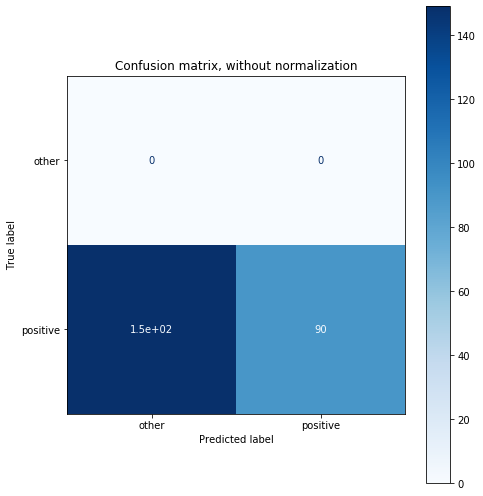

Normalized confusion matrix
[[0.         0.        ]
 [0.62343096 0.37656904]]


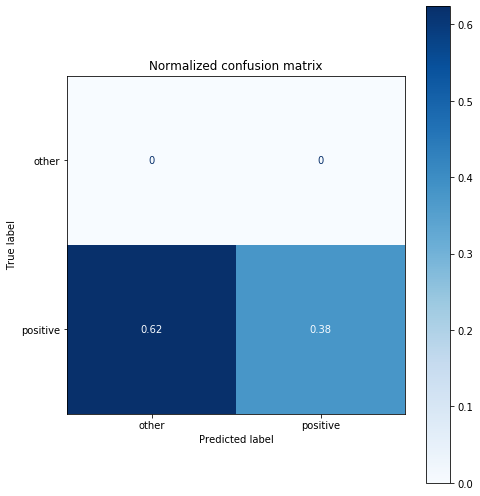

In [61]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [62]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)

X_train_time = data2_b_record_all_feature_50.iloc[0:476]
# X_train_time = data2_b_record_all_feature_60.iloc[0:468]
# X_train_time = data2_b_record_all_feature_70.iloc[0:460]
# X_train_time = data2_b_record_all_feature_80.iloc[0:444]

X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

y_test_time = data2_b_record_all_feature_50.iloc[476:715]
# y_test_time = data2_b_record_all_feature_60.iloc[468:701]
# y_test_time = data2_b_record_all_feature_70.iloc[460:688]
# y_test_time = data2_b_record_all_feature_80.iloc[444:667]

y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)

predict_time = data2_b_record_all_feature_50.iloc[476:715]
# predict_time = data2_b_record_all_feature_60.iloc[468:701]
# predict_time = data2_b_record_all_feature_70.iloc[460:688]
# predict_time = data2_b_record_all_feature_80.iloc[444:667]

predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:21,2020-11-11 15:25:25,other,0.0
1,2020-11-11 15:25:22,2020-11-11 15:25:26,other,0.0
2,2020-11-11 15:25:23,2020-11-11 15:25:27,other,0.0
3,2020-11-11 15:25:24,2020-11-11 15:25:28,other,0.0
4,2020-11-11 15:25:25,2020-11-11 15:25:29,other,0.0
...,...,...,...,...
234,2020-11-11 15:29:53,2020-11-11 15:29:57,positive,1.0
235,2020-11-11 15:29:54,2020-11-11 15:29:58,positive,1.0
236,2020-11-11 15:29:55,2020-11-11 15:29:59,positive,1.0
237,2020-11-11 15:29:56,2020-11-11 15:30:00,positive,1.0


In [63]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:25:21,2020-11-11 15:25:25,positive,1.0
1,2020-11-11 15:25:22,2020-11-11 15:25:26,positive,1.0
2,2020-11-11 15:25:23,2020-11-11 15:25:27,positive,1.0
3,2020-11-11 15:25:24,2020-11-11 15:25:28,positive,1.0
4,2020-11-11 15:25:25,2020-11-11 15:25:29,positive,1.0
...,...,...,...,...
234,2020-11-11 15:29:53,2020-11-11 15:29:57,positive,1.0
235,2020-11-11 15:29:54,2020-11-11 15:29:58,positive,1.0
236,2020-11-11 15:29:55,2020-11-11 15:29:59,positive,1.0
237,2020-11-11 15:29:56,2020-11-11 15:30:00,positive,1.0


In [64]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [65]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [66]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:28,2020-11-11 15:15:32,positive,1.0
2020-11-11 15:15:29,2020-11-11 15:15:33,positive,1.0
2020-11-11 15:15:30,2020-11-11 15:15:34,positive,1.0
2020-11-11 15:15:31,2020-11-11 15:15:35,positive,1.0
2020-11-11 15:15:32,2020-11-11 15:15:36,positive,1.0
...,...,...,...
2020-11-11 15:29:53,2020-11-11 15:29:57,positive,1.0
2020-11-11 15:29:54,2020-11-11 15:29:58,positive,1.0
2020-11-11 15:29:55,2020-11-11 15:29:59,positive,1.0


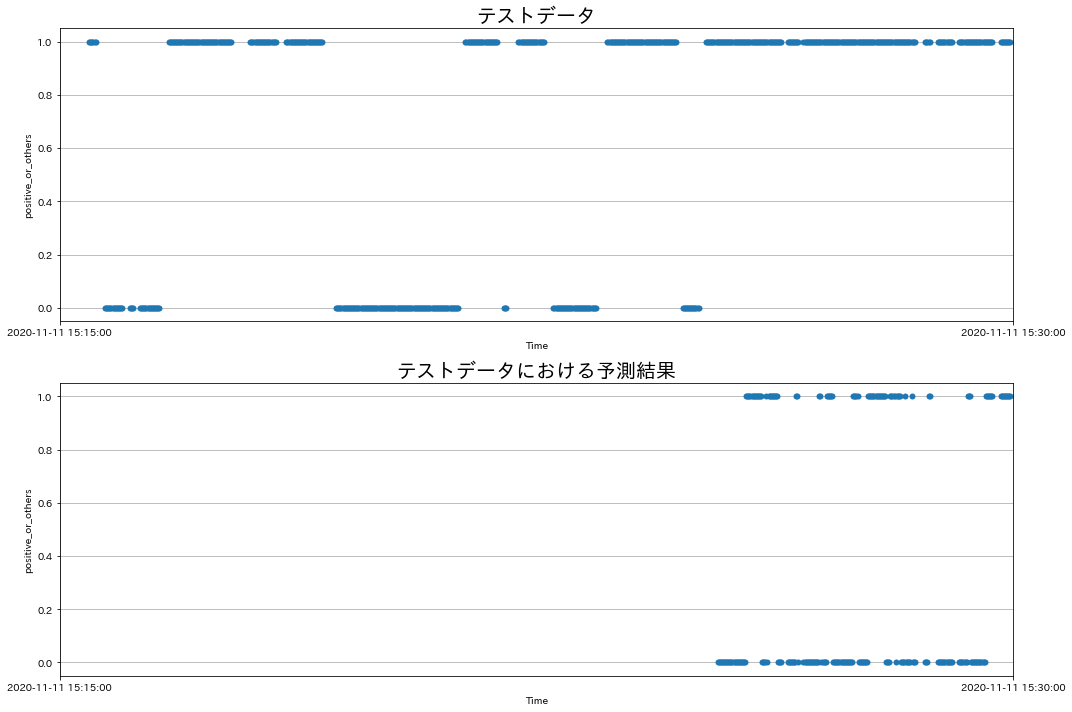

In [67]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)


plt.tight_layout()